# Task 10: KNN – Handwritten Digit Classification

# 1️⃣ Import Required Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 2️⃣ Load Dataset & Check Shape

In [6]:
digits = load_digits()

X = digits.data     # features
y = digits.target   # labels

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1797, 64)
y shape: (1797,)


# 3️⃣ Visualize Few Digit Images

plt.figure(figsize=(8,3))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.show()

# 4️⃣ Train–Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5️⃣ Feature Scaling

In [15]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6️⃣ Train KNN with K = 3

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (K=3):", accuracy)

Accuracy (K=3): 0.9694444444444444


# 7️⃣ Try Multiple K Values

In [21]:
k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# 8️⃣ Plot Accuracy vs K

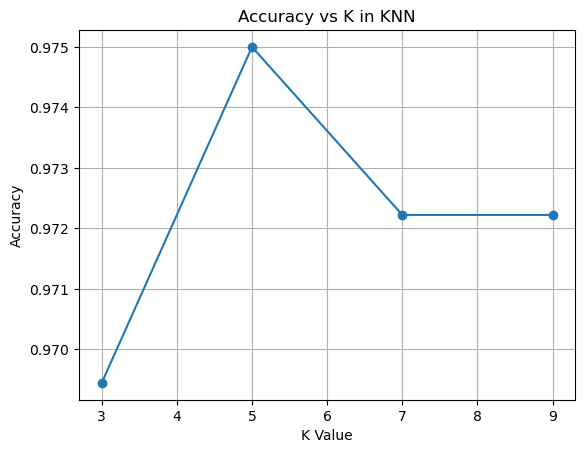

In [24]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K in KNN")
plt.grid()
plt.show()

# 9️⃣ Confusion Matrix

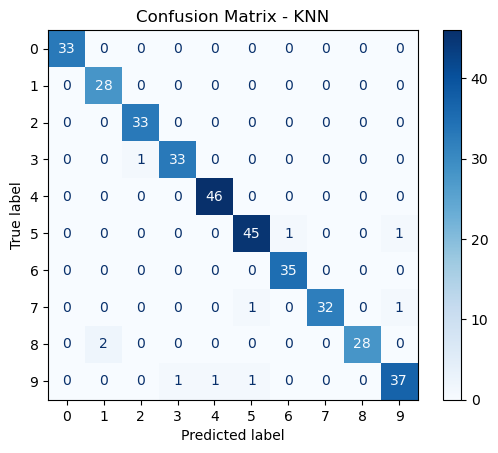

In [27]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.show()

# 1️⃣0️⃣ Display 5 Test Images with Predictions

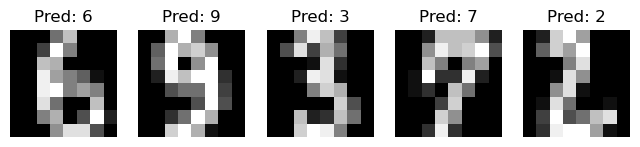

In [30]:
plt.figure(figsize=(8,3))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis('off')

plt.show()